In [2]:
import pandas as pd
train_df=pd.read_csv('C:/Users/22454/Desktop/code/RUL-and-SOH-estimation-of-Lithium-ion-satellite-power-systems-using-support-vector-regression-master/B0005.csv',encoding='gbk', index_col=0)
test_df=pd.read_csv('C:/Users/22454/Desktop/code/RUL-and-SOH-estimation-of-Lithium-ion-satellite-power-systems-using-support-vector-regression-master/B0006.csv',encoding='gbk',index_col=0)
print('训练集的数据⼤⼩：',train_df.shape)
print('测试集的数据⼤⼩：',test_df.shape)
print('-'*30)
print('训练集的数据类型：')
print(train_df.dtypes)
print('-'*30)
print(test_df.dtypes)
train_df.head()


训练集的数据⼤⼩： (168, 4)
测试集的数据⼤⼩： (168, 4)
------------------------------
训练集的数据类型：
cycle                   int64
capacity              float64
max_discharge_temp    float64
max_charge_temp       float64
dtype: object
------------------------------
cycle                   int64
capacity              float64
max_discharge_temp    float64
max_charge_temp       float64
dtype: object


,cycle,capacity,max_discharge_temp,max_charge_temp
0,1,1.856487,38.982181,27.445134
1,2,1.846327,39.033398,29.341949
2,3,1.835349,38.818797,29.553301
3,4,1.835263,38.762305,29.456340
4,5,1.834646,38.665393,29.481334


In [3]:
#----------------查数据的缺失值----------------
print(train_df.isnull().sum())
print('-'*30)
print(test_df.isnull().sum())
#可以看到 数据很密集
#----------------查数据相关性----------------
print('-'*30)
print('查看训练集中数据的相关性')
print(train_df.corr())
print(test_df.corr())
#----------------数据的可视化统计----------------
import matplotlib.pyplot as plt
import seaborn as sns




cycle                 0
capacity              0
max_discharge_temp    0
max_charge_temp       0
dtype: int64
------------------------------
cycle                 0
capacity              0
max_discharge_temp    0
max_charge_temp       0
dtype: int64
------------------------------
查看训练集中数据的相关性
                       cycle  capacity  max_discharge_temp  max_charge_temp
cycle               1.000000 -0.987739            0.914857         0.329499
capacity           -0.987739  1.000000           -0.935272        -0.387755
max_discharge_temp  0.914857 -0.935272            1.000000         0.430054
max_charge_temp     0.329499 -0.387755            0.430054         1.000000
                       cycle  capacity  max_discharge_temp  max_charge_temp
cycle               1.000000 -0.981681            0.838338        -0.308613
capacity           -0.981681  1.000000           -0.850417         0.317900
max_discharge_temp  0.838338 -0.850417            1.000000         0.029324
max_charge_temp    -0.3

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, \
    mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
X = train_df['cycle'].values
y = train_df['capacity'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#定义回归模型评估误差指标
def median_absolute_percentage_error(y_true,y_pred):
    return np.median(np.abs((y_pred-y_true)/y_true))
def regression_metrics(true,pred):
    print('回归模型评估指标结果:')
    print('均方误差【MSE】:', mean_squared_error(true, pred))
    print('均方根误差【RMSE】:',np.sqrt(mean_squared_error(true,pred)))
    print('平均绝对误差【MAE】:',mean_absolute_error(true,pred))
    print('绝对误差中位数【MedianAE】:',median_absolute_error(true,pred))
    print('平均绝对百分比误差【MAPE】:',mean_absolute_percentage_error(true,pred))
    print('绝对百分比误差中位数【MedianAPE】:',median_absolute_percentage_error(true,pred))

#建立LGB的dataset格式数据
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)



lgb_train = LGB.Dataset(X_train, y_train)
lgb_eval = LGB.Dataset(X_test, y_test, reference=lgb_train)
#定义超参数dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'max_depth': 7,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}


#定义callback回调
callback=[LGB.early_stopping(stopping_rounds=10,verbose=True),
          LGB.log_evaluation(period=10,show_stdv=True)]
valid_sets=[lgb_train,lgb_eval]
# 训练 train
m1 = LGB.train(params,lgb_train,num_boost_round=2000,
               valid_sets=[lgb_train,lgb_eval],
               callbacks=callback)
#预测数据集
y_pred = m1.predict(X_test)
#评估模型
regression_metrics(y_test,y_pred)

Training until validation scores don't improve for 10 rounds
[10]	training's l2: 0.00541766	valid_1's l2: 0.00539528
[20]	training's l2: 0.00112341	valid_1's l2: 0.00100625
[30]	training's l2: 0.000375496	valid_1's l2: 0.000329358
[40]	training's l2: 0.000295476	valid_1's l2: 0.000273792
[50]	training's l2: 0.00027946	valid_1's l2: 0.000278408
Early stopping, best iteration is:
[41]	training's l2: 0.000292802	valid_1's l2: 0.000273536
回归模型评估指标结果:
均方误差【MSE】: 0.0002735358987069001
均方根误差【RMSE】: 0.016538920723762483
平均绝对误差【MAE】: 0.012262684067465675
绝对误差中位数【MedianAE】: 0.010517336500585728
平均绝对百分比误差【MAPE】: 0.007974513447764299
绝对百分比误差中位数【MedianAPE】: 0.12506918517533366


e:\anaconda\envs\pytorch\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


In [16]:
import time
objective=['regression_l2','regression_l1','quantile','poisson','mape']
metrics=['l2','mae','quantile','poisson','mape']
metrics_test_data=pd.DataFrame(columns=['objective','metric','MAPE','Median APE','MAE'])
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),
              '开始目标函数与评估函数评估')
for i in objective:
    for k in metrics:
        size=metrics_test_data.size
        params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': i,
            'metric':k,
            'max_depth': 7,
            'num_leaves': 31,
            'learning_rate': 0.1,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': -1
        }
        callback=LGB.early_stopping(stopping_rounds=10,verbose=0)
        gbm = LGB.train(params,lgb_train,num_boost_round=2000,
                valid_sets=lgb_eval,callbacks=[callback])
        y_pred = gbm.predict(X_test)
        metrics_test_data.loc[size]=[i,k,mean_absolute_percentage_error(y_test,y_pred),
                                     median_absolute_percentage_error(y_test,y_pred),
                                     mean_absolute_error(y_test,y_pred)
                                    ]
        print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),i,'+',k,' 完成评估',
              ' best iteration is:',gbm.best_iteration)
# metrics_test_data.to_csv('../result/m1_objective_metric_test.csv',encoding='gbk')
metrics_test_data


2022-09-15 20:02:11 开始目标函数与评估函数评估
2022-09-15 20:02:11 regression_l2 + l2  完成评估  best iteration is: 41
2022-09-15 20:02:11 regression_l2 + mae  完成评估  best iteration is: 40
2022-09-15 20:02:11 regression_l2 + quantile  完成评估  best iteration is: 49
2022-09-15 20:02:11 regression_l2 + poisson  完成评估  best iteration is: 41
2022-09-15 20:02:11 regression_l2 + mape  完成评估  best iteration is: 40
2022-09-15 20:02:11 regression_l1 + l2  完成评估  best iteration is: 45
2022-09-15 20:02:11 regression_l1 + mae  完成评估  best iteration is: 40
2022-09-15 20:02:11 regression_l1 + quantile  完成评估  best iteration is: 40
2022-09-15 20:02:11 regression_l1 + poisson  完成评估  best iteration is: 45
2022-09-15 20:02:11 regression_l1 + mape  完成评估  best iteration is: 39
2022-09-15 20:02:12 quantile + l2  完成评估  best iteration is: 150
2022-09-15 20:02:12 quantile + mae  完成评估  best iteration is: 165
2022-09-15 20:02:12 quantile + quantile  完成评估  best iteration is: 120
2022-09-15 20:02:12 quantile + poisson  完成评估  best iteratio

,objective,metric,MAPE,Median APE,MAE
0,regression_l2,l2,0.007975,0.125069,0.012263
5,regression_l2,mae,0.007965,0.124738,0.012248
10,regression_l2,quantile,0.008234,0.125616,0.012661
15,regression_l2,poisson,0.007975,0.125069,0.012263
20,regression_l2,mape,0.007965,0.124738,0.012248
25,regression_l1,l2,0.008721,0.124405,0.013442
30,regression_l1,mae,0.008693,0.124470,0.013387
35,regression_l1,quantile,0.008693,0.124470,0.013387
40,regression_l1,poisson,0.008721,0.124405,0.013442
45,regression_l1,mape,0.008693,0.124496,0.013388


选择regression_l2 + mae的组合

In [19]:
#提供Median APE指标
from sklearn.metrics import make_scorer
neg_median_absolute_percentage_error=make_scorer(median_absolute_percentage_error, greater_is_better=False)

使用网格搜索调参，因为引入了N折交叉验证的方法，所以所有GridSearch过程均在全量样本上进行fit
step1：首先声明一个基础模型model_lgb
step2:设置需要搜索的参数params_test1,支持range方法，也可以写list
step3：设置GridSearchCV()，scoring为评估函数，cv=5为五折交叉验证


In [23]:
#开始gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),'开始树深度和叶子结点数GridSearch')
model_lgb = LGB.LGBMRegressor(objective='regression_l1',
                              metric='quantile',
                              learning_rate=0.1,
                              subsample = 0.8,
                              colsample_bytree = 0.8,
                              subsample_freq = 5)
params_test1={
    'max_depth': range(7,11,1), 
    'num_leaves':range(10,90,1)  
}
gsearch1 = GridSearchCV(estimator=model_lgb,
                        param_grid=params_test1,
                        scoring=neg_median_absolute_percentage_error,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
X = X.reshape(-1, 1)

gsearch1.fit(X, y)
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),'完成树深度和叶子结点数GridSearch')
print('Best parameters found by grid search are:', gsearch1.best_params_)

2022-09-15 20:18:20 开始树深度和叶子结点数GridSearch
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
2022-09-15 20:18:22 完成树深度和叶子结点数GridSearch
Best parameters found by grid search are: {'max_depth': 7, 'num_leaves': 10}


e:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found by grid search are: {'max_depth': 7, 'num_leaves': 10}

In [24]:
#叶子节点最小数据量与最小hessian
params_test3={
    'min_child_samples':[19,20,21,22,23,24,25],
    'min_child_weight':[0.001,0.002]
    } 
gsearch1 = GridSearchCV(estimator=model_lgb,
                        param_grid=params_test3,
                        scoring=neg_median_absolute_percentage_error,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gsearch1.fit(X, y)
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),'完成树深度和叶子结点数GridSearch')
print('Best parameters found by grid search are:', gsearch1.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
2022-09-15 20:24:47 完成树深度和叶子结点数GridSearch
Best parameters found by grid search are: {'min_child_samples': 19, 'min_child_weight': 0.001}


e:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found by grid search are: {'min_child_samples': 19, 'min_child_weight': 0.001}

In [25]:
#特征与样本的随机采样率
params_test4={
    'subsample': [0.7,0.8,0.9],
    'colsample_bytree': [0.7,0.8,0.9] 
    } 
gsearch1 = GridSearchCV(estimator=model_lgb,
                        param_grid=params_test4,
                        scoring=neg_median_absolute_percentage_error,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gsearch1.fit(X, y)
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),'完成树深度和叶子结点数GridSearch')
print('Best parameters found by grid search are:', gsearch1.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
2022-09-15 20:26:03 完成树深度和叶子结点数GridSearch
Best parameters found by grid search are: {'colsample_bytree': 0.7, 'subsample': 0.9}


e:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found by grid search are: {'colsample_bytree': 0.7, 'subsample': 0.9}

In [26]:
#正则化参数
params_test5={
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3]
    } 
gsearch1 = GridSearchCV(estimator=model_lgb,
                        param_grid=params_test5,
                        scoring=neg_median_absolute_percentage_error,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
gsearch1.fit(X, y)
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()),'完成树深度和叶子结点数GridSearch')
print('Best parameters found by grid search are:', gsearch1.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
2022-09-15 20:27:15 完成树深度和叶子结点数GridSearch
Best parameters found by grid search are: {'reg_alpha': 0.3, 'reg_lambda': 0.03}


e:\anaconda\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found by grid search are: {'reg_alpha': 0.3, 'reg_lambda': 0.03}
确定最优超参数组合后，完成对模型M2的训练

In [32]:

params2 = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'max_depth': 7,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,

    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'colsample_bytree': 0.7,
    'subsample': 0.9,
    'reg_alpha': 0.3, 
    'reg_lambda': 0.03,
    
}
lgb_train2 = LGB.Dataset(X_train, y_train)
lgb_eval2 = LGB.Dataset(X_test, y_test, reference=lgb_train)

#定义callback回调
callback=[LGB.early_stopping(stopping_rounds=10,verbose=True),
          LGB.log_evaluation(period=10,show_stdv=True)]
valid_sets=[lgb_train2,lgb_eval2]
# 训练 train
m2 = LGB.train(params2,lgb_train,num_boost_round=2000,
               valid_sets=[lgb_train2,lgb_eval2],
               callbacks=callback)
#预测数据集
y_pred = m2.predict(X_test)
#评估模型
regression_metrics(y_test,y_pred)

Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.00645596	valid_1's l2: 0.00651968
[20]	valid_0's l2: 0.00174701	valid_1's l2: 0.00170763
[30]	valid_0's l2: 0.000682189	valid_1's l2: 0.000631676
[40]	valid_0's l2: 0.000475334	valid_1's l2: 0.000432258
[50]	valid_0's l2: 0.000417696	valid_1's l2: 0.000389188
[60]	valid_0's l2: 0.000392639	valid_1's l2: 0.000373581
[70]	valid_0's l2: 0.000381415	valid_1's l2: 0.000366018
[80]	valid_0's l2: 0.000362918	valid_1's l2: 0.000352492
[90]	valid_0's l2: 0.00034662	valid_1's l2: 0.000336954
[100]	valid_0's l2: 0.000338701	valid_1's l2: 0.000334387
[110]	valid_0's l2: 0.000336585	valid_1's l2: 0.000332262
[120]	valid_0's l2: 0.000333533	valid_1's l2: 0.000329428
[130]	valid_0's l2: 0.000332143	valid_1's l2: 0.000328638
[140]	valid_0's l2: 0.000331228	valid_1's l2: 0.000328478
[150]	valid_0's l2: 0.000329174	valid_1's l2: 0.000326164
[160]	valid_0's l2: 0.000326161	valid_1's l2: 0.000325496
[170]	valid_0's l2: 0.000

e:\anaconda\envs\pytorch\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


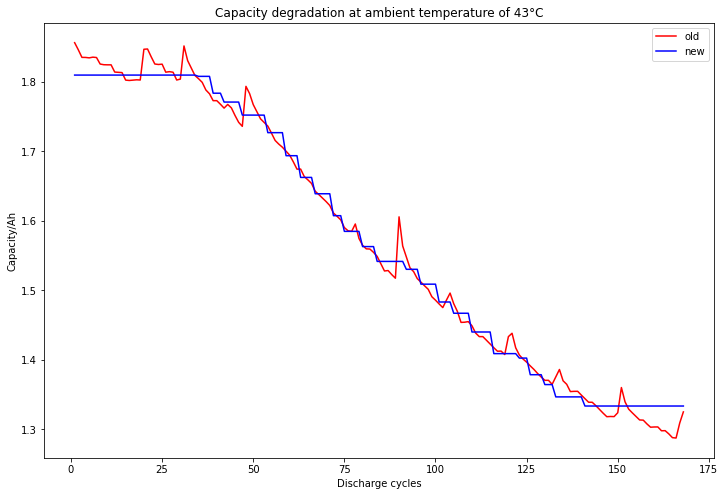

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, y, color='red', label='old')
ax.plot(X, m2.predict(X), color='blue', label='new')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 43°C')
plt.legend()